In [2]:
# generate future y values using past x values AND greater offset y values 

In [65]:
import pandas as pd
import numpy as np
import os
import shutil
import openpyxl
import matplotlib.pyplot as plt
# import seaborn as sns
# import matplotlib as plt
import re

from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV



from sklearn.preprocessing import MinMaxScaler


from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline, FeatureUnion, make_pipeline
from sklearn.compose import ColumnTransformer


from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA

from sklearn.metrics import mean_squared_error, mean_absolute_error



from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, Dropout, Input, TimeDistributed
from scikeras.wrappers import KerasRegressor


import pickle


print('yes')

yes


In [20]:

def train_test_split_time_series(df,
                                 test_ratio=0.3,
                                 time="Time",
                                 labels="Class"):
    df.sort_values(time, inplace=True)
    total_samples = df.shape[0]
    train_idx = int(total_samples * (1 - test_ratio))
    XTrain = df.loc[:train_idx, df.columns != 'Class'].values
    yTrain = df.loc[:train_idx, df.columns == 'Class'].values
    XTest = df.loc[train_idx:, df.columns != 'Class'].values
    yTest = df.loc[train_idx:, df.columns == 'Class'].values

    return XTrain, yTrain, XTest, yTest


def reshape_to_batches(matrix, batch_size):
    batch_num = np.ceil(matrix.shape[0] / batch_size)
    modulo = batch_num * batch_size - matrix.shape[0]
    if modulo != 0:
        padding = np.zeros((int(modulo), matrix.shape[1]))
        matrix = np.vstack((matrix, padding))

    return np.array(np.split(matrix, batch_num))


def convert_3d_to_2d(arr):
    return arr.reshape(arr.shape[0] * arr.shape[1], arr.shape[2])

In [3]:

def convert_to_dataframe(x):
    return pd.DataFrame(x)


In [4]:
def create_dataset(data, time_steps=1):
    X, Y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:(i + time_steps), :])
        Y.append(data[i + time_steps, 0])
        
    return np.array(X), np.array(Y)




In [5]:
def predict_future(model, data, seq_length, future_steps):
    future_predictions = []
    current_sequence = data[-seq_length:].reshape(1, seq_length, data.shape[1])
    
    return(current_sequence)

In [6]:
df = pd.read_csv(r'C:\Users\whiter04\OneDrive - Johnson Matthey\00. cspark\ELY\ELY-TimeSeries\Data\master_data_frame.csv')
df_copy = df.copy()
df_copy = df_copy.drop('Unnamed: 0',axis=1) 
df_copy


to_drop = ['temp_anode_inlet_set', 
           'temp_cathode_inlet_set', 
           'pressure_anode_set',
           'pressure_cathode_set', 
           'flow_anode_di_water_supply_set', 
           'flow_cathode_di_water_supply_set', 
          'flow_cathode_di_water_supply', 
           'signal_in_o2_in_h2_sensor']

df_copy = df_copy.drop(to_drop, axis=1)
df_copy


df_copy['seconds'] = (df_copy['time_running_total']/1000).astype(int)
df_copy['minutes'] = (df_copy['seconds']/60).astype(int)


df_copy = df_copy.drop('time_running_total',axis=1)

# df_copy = df_copy.tail(150000)
df_copy

,cell_voltage_001,current,current_density,temp_anode_inlet,temp_anode_outlet,temp_cathode_inlet,temp_cathode_outlet,pressure_anode_inlet,pressure_anode_outlet,pressure_cathode_inlet,pressure_cathode_outlet,flow_anode_di_water_supply,signal_in_resistivity_anode,signal_in_resistivity_cathode,signal_in_h2_in_o2_sensor,seconds,minutes
0,-0.095167,-0.01262,-0.000505,22.524658,22.211363,22.943993,22.664978,0.015911,-0.026205,-0.009285,-0.009439,0.149858,0.142337,0.580925,0.278146,0,0
1,-0.095167,-0.01262,-0.000505,22.524658,22.211363,22.943993,22.664978,0.015911,-0.026205,-0.009285,-0.009439,0.149858,0.142337,0.580925,0.278146,0,0
2,-0.095167,-0.01262,-0.000505,22.524658,22.211363,22.943993,22.664978,0.015911,-0.026205,-0.009285,-0.009439,0.149858,0.142337,0.580925,0.278146,0,0
3,-0.095167,-0.01192,-0.000477,23.574999,22.622944,22.930300,22.651320,0.184089,-0.026205,-0.009285,-0.001021,0.270174,0.132591,0.585798,0.276583,30,0
4,-0.095167,-0.01192,-0.000477,23.574999,22.622944,22.930300,22.651320,0.184089,-0.026205,-0.009285,-0.001021,0.270174,0.132591,0.585798,0.276583,30,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
461237,1.879790,75.00482,3.000193,79.819145,78.329117,29.627552,34.574463,1.992006,1.723834,6.002450,6.019177,0.300858,0.230055,0.152083,0.104703,4934550,82242
461238,1.879790,75.00482,3.000193,79.819145,78.329117,29.627552,34.574463,1.992006,1.723834,6.002450,6.019177,0.300858,0.230055,0.152083,0.104703,4934550,82242
461239,1.880171,75.00482,2.999912,79.819145,78.354111,29.627552,34.560806,1.992006,1.723834,6.002450,5.960248,0.300858,0.215435,0.156957,0.103140,4934580,82243
461240,1.880171,75.00482,2.999912,79.819145,78.354111,29.627552,34.560806,1.992006,1.723834,6.002450,5.960248,0.300858,0.215435,0.156957,0.103140,4934580,82243


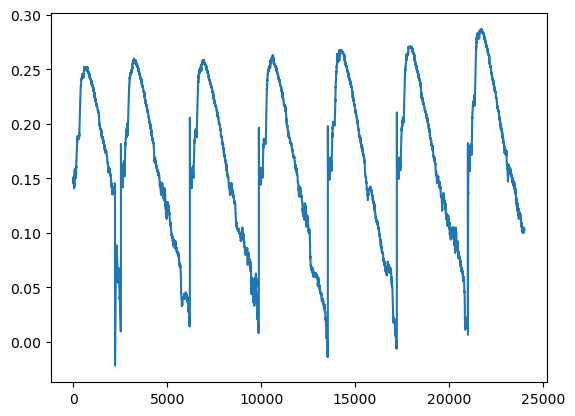

,signal_in_h2_in_o2_sensor
minutes,
2024-06-24 08:37:00,0.145329
2024-06-24 08:38:00,0.145329
2024-06-24 08:39:00,0.145329
2024-06-24 08:40:00,0.145329
2024-06-24 08:41:00,0.145329
...,...
2024-07-12 02:39:00,0.101265
2024-07-12 02:40:00,0.103140
2024-07-12 02:41:00,0.103140


In [7]:
# import matplotlib as plt

time_period = 'minutes'

df_time = df_copy.groupby(time_period).mean().reset_index()

downsampled_df = df_time.tail(24000).reset_index()

# downsampled_df = downsampled_df[['minutes','cell_voltage_001','current','signal_in_h2_in_o2_sensor']]

downsampled_df = downsampled_df[['minutes','signal_in_h2_in_o2_sensor']]


downsampled_df[time_period] = pd.to_datetime('2024-05-16 00:00:00') + pd.to_timedelta(downsampled_df[time_period], unit='m')



plt.plot(downsampled_df['signal_in_h2_in_o2_sensor'])

plt.show()

downsampled_df = downsampled_df.set_index('minutes')
downsampled_df

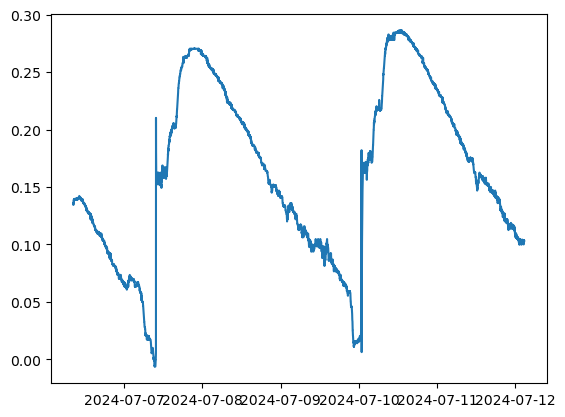

In [8]:
l = len(downsampled_df)
train_length = 15700

downsampled_1_df = downsampled_df.head(15700)
downsampled_2_df = downsampled_df.tail(l-train_length)

plt.plot(downsampled_2_df['signal_in_h2_in_o2_sensor'])

plt.show()

# downsampled_2_df

In [66]:




# pipeline


pipeline = ColumnTransformer([
    ('voltage_current_scaler', MinMaxScaler(), ['signal_in_h2_in_o2_sensor']),
    ('trend_scaler', StandardScaler(), ['trend'])

])




y_pipeline = Pipeline([
    ('scaler', MinMaxScaler()),

])





trend = (np.arange(len(downsampled_2_df))).tolist()
downsampled_2_df['trend'] = trend


X = pipeline.fit_transform(downsampled_2_df)
print(f'Shape: {X.shape}')







Shape: (8300, 2)


C:\Users\whiter04\AppData\Local\Temp\ipykernel_7444\457850751.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downsampled_2_df['trend'] = trend


In [90]:
id_h2 = 0 
y = np.expand_dims(X[1:, id_h2], -1)

#initially we are going to exclude the price feature from the data set entirely
X_ = X[0:-1, np.arange(X.shape[1]) != id_h2]

print(f'Shape of features: {X.shape}')
print(f'Shape of labels: {y.shape}')

Shape of features: (8300, 2)
Shape of labels: (8299, 1)


In [126]:
def create_sliding_window(X, y, n_timesteps):
    """
    Function to create sliding windows from time series data.
    
    Parameters:
    - X: The feature data (e.g., time series data)
    - y: The target data (e.g., the values to predict)
    - n_timesteps: Number of previous timesteps to use as input
    
    Returns:
    - X_new: Reshaped data with sliding windows
    - y_new: Target values corresponding to the sliding windows
    """
    X_new, y_new = [], []
    
    # Ensure both X and y indices remain in bounds
    for i in range(len(X) - n_timesteps-1):
        X_new.append(X[i:i + n_timesteps])  # Past `n_timesteps` observations
        y_new.append(y[i + n_timesteps])    # The value at the next time step

        # print((X[i:i + n_timesteps]))
        # print(y[i + n_timesteps])
        print(i)



    return np.array(X_new), np.array(y_new)

# Example usage:
n_timesteps = 200  # Using 10 previous time steps to predict the next value
X_new, y_new = create_sliding_window(X, y, n_timesteps)

print(f'Shape of X_new: {X_new.shape}')  # Expected: (samples, timesteps, features)
print(f'Shape of y_new: {y_new.shape}')  # Expected: (samples, 1)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [127]:
def train_test_split_time_series_regres(X, y, test_ratio=0.15):
    total_samples = X.shape[0]
    train_idx = int(total_samples * (1-test_ratio))
    XTrain = X[:train_idx]
    yTrain = y[:train_idx]
    XTest = X[train_idx:]
    yTest = y[train_idx:]
    return XTrain, yTrain, XTest, yTest

In [135]:
X_train_full, y_train_full, XTest, yTest = train_test_split_time_series_regres(X_new, y_new)
print(f'Shape of training features: {X_train_full.shape}')
print(f'Shape of training labels: {y_train_full.shape}')
print(f'Shape of test features: {XTest.shape}')
print(f'Shape of test labels: {yTest.shape}')


X_train, y_train,  X_val, y_val  = train_test_split_time_series_regres(X_train_full, y_train_full)
print(f'Shape of training features: {XTrain.shape}')
print(f'Shape of training labels: {yTrain.shape}')
print(f'Shape of test features: {X_val.shape}')
print(f'Shape of test labels: {y_val.shape}')





Shape of training features: (6884, 200, 2)
Shape of training labels: (6884, 1)
Shape of test features: (1215, 200, 2)
Shape of test labels: (1215, 1)
Shape of training features: (6884, 200, 2)
Shape of training labels: (6884, 1)
Shape of test features: (1033, 200, 2)
Shape of test labels: (1033, 1)


In [136]:
def create_model_opt_1():
    model = Sequential()
    
    model.add(LSTM(110,
                   return_sequences = True,
                   input_shape = (XTrain.shape[1], XTrain.shape[2])))


    model.add(Dropout(0.4))


    model.add(LSTM(90, return_sequences = True))


    # model.add(Dropout(0.1))

    model.add(LSTM(90, return_sequences = True))
 
    model.add(Dropout(0.4))
    
    model.add(LSTM(110, return_sequences = True))

    model.add(LSTM(120, return_sequences = True))

    model.add(LSTM(130, return_sequences = False))
    

    model.add(Dense(1))         
                           
    
    
    model.compile(optimizer='adam', 
                  loss = 'mean_squared_error', 
                  metrics = ['mse'])


    
    return model

In [137]:


from tensorflow.keras.callbacks import EarlyStopping

# Define early stopping criteria
early_stopping = EarlyStopping(
    monitor='val_loss',  # The metric to monitor (usually validation loss)
    patience=5,          # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True  # Restore the model weights from the epoch with the best value of the monitored metric
)




optimised_model_1 = create_model_opt_1()


optimised_model_1.fit(x=XTrain,
    y=yTrain,
    epochs=100,
    batch_size=128,
    callbacks=[early_stopping],
    validation_data=(X_val, y_val),
                     )



Epoch 1/100
54/54 [==============================] - 154s 2s/step - loss: 0.0445 - mse: 0.0445 - val_loss: 4.0473e-04 - val_mse: 4.0473e-04
Epoch 2/100
54/54 [==============================] - 114s 2s/step - loss: 0.0021 - mse: 0.0021 - val_loss: 2.2974e-04 - val_mse: 2.2974e-04
Epoch 3/100
54/54 [==============================] - 107s 2s/step - loss: 0.0019 - mse: 0.0019 - val_loss: 8.3501e-04 - val_mse: 8.3501e-04
Epoch 4/100
54/54 [==============================] - 104s 2s/step - loss: 0.0019 - mse: 0.0019 - val_loss: 1.4471e-04 - val_mse: 1.4471e-04
Epoch 5/100
54/54 [==============================] - 108s 2s/step - loss: 0.0018 - mse: 0.0018 - val_loss: 6.6191e-05 - val_mse: 6.6191e-05
Epoch 6/100
54/54 [==============================] - 108s 2s/step - loss: 0.0017 - mse: 0.0017 - val_loss: 8.5621e-04 - val_mse: 8.5621e-04
Epoch 7/100
54/54 [==============================] - 110s 2s/step - loss: 0.0017 - mse: 0.0017 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 8/100
54/54 [=========

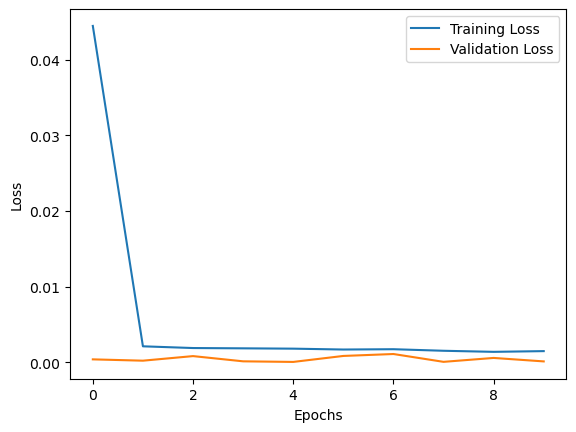

In [148]:
import matplotlib.pyplot as plt

# Plot the training and validation loss over epochs
plt.plot(optimised_model_1.history.history['loss'], label='Training Loss')
plt.plot(optimised_model_1.history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [151]:
# Your code here...
y_pred_lstm = optimised_model_1.predict(XTest)

print(f'Shape of labels: {yTest.shape}')
print(f'Shape of predictions: {y_pred_lstm.shape}')

print("MAE: {0:.5f}".format(mean_absolute_error(yTest, y_pred_lstm)))
print("MSE: {0:.5f}".format(mean_squared_error(yTest, y_pred_lstm)))


38/38 [==============================] - 16s 418ms/step
Shape of labels: (1215, 1)
Shape of predictions: (1215, 1)
MAE: 0.00606
MSE: 0.00007


Text(0, 0.5, 'Predicted')

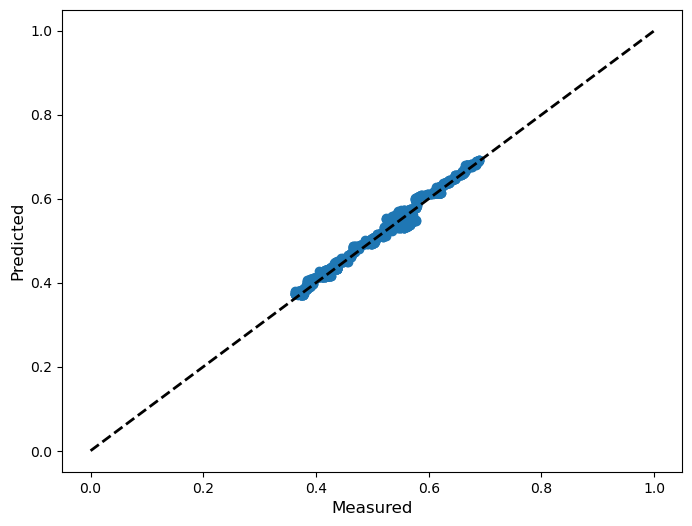

In [152]:
# Your code here...
plt.figure(figsize=(8, 6))
plt.scatter(yTest, y_pred_lstm)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Measured', fontsize=12)
plt.ylabel('Predicted', fontsize=12)


In [ ]:
import datetime
import numpy as np
import pandas as pd

# Initialize predictions
predictions = np.array([]).reshape(-1, 1)

# Parameters

num = 0

time_steps=200

n=time_steps
n_predictions = 10000
window_size = time_steps

y_offset = time_steps

# y_offset_1 = y_offset


scaler = MinMaxScaler()

predictions = []





# Previous data setup
previous_data = downsampled_1_df.copy()

prev_y_and_new_y = pd.DataFrame(previous_data['signal_in_h2_in_o2_sensor'])
trend = (np.arange(len(prev_y_and_new_y))).tolist()
prev_y_and_new_y['trend'] = trend
prev_y_and_new_y



new_data = downsampled_2_df.copy()
new_data = new_data.drop(['signal_in_h2_in_o2_sensor'], axis=1)



new_data




# # Prepare recent features

last_trend_value = prev_y_and_new_y['trend'].iloc[-1]  # Get the last value of the existing trend
new_data['trend'] = np.arange(last_trend_value + 1, last_trend_value + 1 + len(new_data)).tolist()
new_data


scaler.fit(previous_data[['signal_in_h2_in_o2_sensor']])



# # Initial  values (taken from the last 3  values)
initial_y = previous_data['signal_in_h2_in_o2_sensor'].iloc[-n:].tolist()




y_offset_1 = len(prev_y_and_new_y)
window_size = time_steps



# new_smoothed_y = initial_smoothed_y.copy()

fiter = pipeline.fit(prev_y_and_new_y)

for preds in range(n_predictions):
    

    
    
    lagged_y = prev_y_and_new_y.iloc[y_offset_1-window_size:y_offset_1]
    # print(f'lagged_y:{lagged_y}')
    
    lagged_y_trans = fiter.transform(pd.DataFrame(lagged_y))
    # print(lagged_y_trans)
    
    
    lagged_y_trans.shape
    lagged_y_trans = np.reshape(lagged_y_trans, (1, time_steps, 2))
    
    # print(lagged_y_trans.shape)
    
    
    predictions = optimised_model_1.predict(lagged_y_trans)

    # predictions = predictions_1*0.5 + predictions_2*0.5
    
    # predictions = optimised_model.predict(lagged_y_trans)
    print(predictions)
    
    
    scaler = fiter.named_transformers_['voltage_current_scaler']
    true_predictions = scaler.inverse_transform(predictions)
    print(true_predictions)
    prev_y_and_new_y
    
    
    last_value = prev_y_and_new_y['trend'].iloc[-1]
    new_row = pd.DataFrame({'signal_in_h2_in_o2_sensor': [true_predictions[0][0]], 'trend': [last_value+1]})
    
    prev_y_and_new_y = pd.concat([prev_y_and_new_y, new_row], ignore_index=True)
    
    # print(prev_y_and_new_y)
    y_offset_1 += 1






1/1 [==============================] - 0s 309ms/step
[[0.5276356]]
[[0.13082553]]
1/1 [==============================] - 0s 119ms/step
[[0.5278171]]
[[0.13087805]]
1/1 [==============================] - 0s 115ms/step
[[0.5280812]]
[[0.13095447]]
1/1 [==============================] - 0s 96ms/step
[[0.52841204]]
[[0.13105023]]
1/1 [==============================] - 0s 111ms/step
[[0.5287898]]
[[0.13115954]]
1/1 [==============================] - 0s 109ms/step
[[0.52919316]]
[[0.13127626]]
1/1 [==============================] - 0s 101ms/step
[[0.5295997]]
[[0.13139392]]
1/1 [==============================] - 0s 101ms/step
[[0.52998877]]
[[0.1315065]]
1/1 [==============================] - 0s 98ms/step
[[0.53034157]]
[[0.1316086]]
1/1 [==============================] - 0s 96ms/step
[[0.53064287]]
[[0.13169579]]
1/1 [==============================] - 0s 95ms/step
[[0.5308817]]
[[0.1317649]]
1/1 [==============================] - 0s 117ms/step
[[0.53105104]]
[[0.13181391]]
1/1 [============

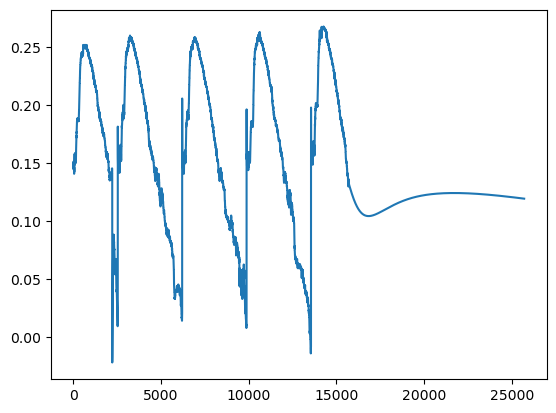

In [160]:
plt.plot(prev_y_and_new_y['signal_in_h2_in_o2_sensor'])

In [63]:
yTest

array([[0.69978702],
       [0.69978702],
       [0.69978702],
       ...,
       [0.37393037],
       [0.37606774],
       [0.37393037]])

In [119]:
X_train.shape

(12460, 100, 2)

In [101]:
# Tuning of Hyperparameters 

In [102]:
import keras.backend as K
from keras.callbacks import EarlyStopping
import keras_tuner as kt
from tensorflow.keras.layers import Dropout
from keras_tuner.tuners import RandomSearch
from keras_tuner.engine.hyperparameters import HyperParameters

In [188]:
def create_model(hp):
    model = Sequential()
    
    model.add(LSTM(hp.Int('input_unit', min_value = 90, max_value = 150, step = 10),
                   return_sequences = True,
                   input_shape = (X_train.shape[1], X_train.shape[2])))


    model.add(Dropout(hp.Float('Dropout_rate_1', min_value=0, max_value=0.5, step=0.1)))


    for i in range(hp.Int('n_layers', 1, 4)):
        model.add(LSTM(hp.Int(f'lstm_{i}_units', min_value=90, max_value=150, step=10),
                      return_sequences=True if i < hp.Int('n_layers', 1, 10) - 1 else False))


    model.add(Dropout(hp.Float('Dropout_rate_2', min_value=0, max_value=0.5, step=0.1)))


    model.add(Dense(1))         
                           
    
    
    model.compile(optimizer='adam', loss = 'mean_squared_error', metrics = ['mse'])
    return model

In [189]:
tuner= kt.RandomSearch(
        create_model,
        objective='mse',
        max_trials=30,
        executions_per_trial=3,
        directory='.\hp_test_bb01',
        project_name='hp_bb01'
        )

In [ ]:
tuner.search(
    x=X_train,
    y=y_train,
    epochs=20,
    batch_size=64,
    validation_data=(X_test, y_test),
    verbose=1
)


best_model = tuner.get_best_models(num_models=1)[0]


best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

for param, value in best_hps.values.items():
    print(f"{param}: {value}")

Trial 8 Complete [00h 21m 06s]
mse: 0.0009765121115682026

Best mse So Far: 0.0003441933949943632
Total elapsed time: 02h 22m 17s

Search: Running Trial #9

Value             |Best Value So Far |Hyperparameter
90                |110               |input_unit
0.2               |0.4               |Dropout_rate_1
4                 |1                 |n_layers
150               |90                |lstm_0_units
0.4               |0                 |Dropout_rate_2
150               |110               |lstm_1_units
100               |120               |lstm_2_units
140               |130               |lstm_3_units

Epoch 1/20
197/197 [==============================] - 52s 157ms/step - loss: 0.0201 - mse: 0.0201 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2/20
197/197 [==============================] - 25s 128ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 8.7263e-04 - val_mse: 8.7263e-04
Epoch 3/20
197/197 [==============================] - 30s 155ms/step - loss: 0.0035 - mse: 0.0035 - val_l

In [122]:
model = create_model()

In [172]:
model.fit(x=X_train,
    y=y_train,
    epochs=20,
    batch_size=128,
    validation_data=(X_test, y_test),)

Epoch 1/20
99/99 [==============================] - 3s 33ms/step - loss: 9.1448e-04 - mse: 9.1448e-04 - val_loss: 7.6234e-04 - val_mse: 7.6234e-04
Epoch 2/20
99/99 [==============================] - 3s 33ms/step - loss: 9.0089e-04 - mse: 9.0089e-04 - val_loss: 7.3404e-04 - val_mse: 7.3404e-04
Epoch 3/20
99/99 [==============================] - 4s 38ms/step - loss: 8.4631e-04 - mse: 8.4631e-04 - val_loss: 6.3261e-04 - val_mse: 6.3261e-04
Epoch 4/20
99/99 [==============================] - 4s 39ms/step - loss: 7.9860e-04 - mse: 7.9860e-04 - val_loss: 5.4534e-04 - val_mse: 5.4534e-04
Epoch 5/20
99/99 [==============================] - 4s 37ms/step - loss: 8.4720e-04 - mse: 8.4720e-04 - val_loss: 3.9830e-04 - val_mse: 3.9830e-04
Epoch 6/20
99/99 [==============================] - 4s 39ms/step - loss: 7.7205e-04 - mse: 7.7205e-04 - val_loss: 4.0139e-04 - val_mse: 4.0139e-04
Epoch 7/20
99/99 [==============================] - 4s 41ms/step - loss: 7.3767e-04 - mse: 7.3767e-04 - val_loss: 6.18

In [120]:
def create_model_opt_1():
    model = Sequential()
    
    model.add(LSTM(110,
                   return_sequences = True,
                   input_shape = (X_train.shape[1], X_train.shape[2])))


    model.add(Dropout(0.4))


    model.add(LSTM(90, return_sequences = True))


    # model.add(Dropout(0.1))

    model.add(LSTM(90, return_sequences = True))

    model.add(Dropout(0.4))
    
    model.add(LSTM(110, return_sequences = True))

    model.add(LSTM(120, return_sequences = True))

    model.add(LSTM(130, return_sequences = False))
    

    model.add(Dense(1))         
                           
    
    
    model.compile(optimizer='adam', loss = 'mean_squared_error', metrics = ['mse'])
    return model

In [121]:
def create_model_opt_2():
    model = Sequential()
    
    model.add(LSTM(110,
                   return_sequences = True,
                   input_shape = (X_train.shape[1], X_train.shape[2])))


    model.add(Dropout(0.4))


    model.add(LSTM(90, return_sequences = True))


    # model.add(Dropout(0.1))

    model.add(LSTM(90, return_sequences = True))

    # model.add(Dropout(0.4))
    
    model.add(LSTM(110, return_sequences = True))

    model.add(LSTM(120, return_sequences = True))

    model.add(LSTM(130, return_sequences = False))
    

    model.add(Dense(1))         
                           
    
    
    model.compile(optimizer='adam', loss = 'mean_squared_error', metrics = ['mse'])
    return model

In [122]:

optimised_model_1 = create_model_opt_1()


optimised_model_2 = create_model_opt_2()



optimised_model_1.fit(x=X_train,
    y=y_train,
    epochs=20,
    batch_size=128,
    validation_data=(X_test, y_test),)




optimised_model_2.fit(x=X_train,
    y=y_train,
    epochs=20,
    batch_size=128,
    validation_data=(X_test, y_test),)





predictions_1 = optimised_model_1.predict(X_test)
predictions_2 = optimised_model_2.predict(X_test)


predictions = predictions_1*0.5 + predictions_2*0.5


import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual Crossover Rate')
plt.plot(predictions, label='Predicted Crossover Rate')
plt.legend()
plt.show()


Epoch 1/20
98/98 [==============================] - 337s 3s/step - loss: 0.0320 - mse: 0.0320 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 2/20
98/98 [==============================] - 241s 2s/step - loss: 0.0022 - mse: 0.0022 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 3/20
98/98 [==============================] - 205s 2s/step - loss: 0.0020 - mse: 0.0020 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 4/20
98/98 [==============================] - 230s 2s/step - loss: 0.0019 - mse: 0.0019 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 5/20
98/98 [==============================] - 231s 2s/step - loss: 0.0018 - mse: 0.0018 - val_loss: 0.0021 - val_mse: 0.0021
Epoch 6/20
98/98 [==============================] - ETA: 0s - loss: 0.0016 - mse: 0.0016

KeyboardInterrupt: 

In [116]:
import datetime
import numpy as np
import pandas as pd

# Initialize predictions
predictions = np.array([]).reshape(-1, 1)

# Parameters

num = 0

n=time_steps
n_predictions = 10000
window_size = time_steps

y_offset = time_steps

# y_offset_1 = y_offset


scaler = MinMaxScaler()

predictions = []





# Previous data setup
previous_data = downsampled_1_df.copy()

prev_y_and_new_y = pd.DataFrame(previous_data['signal_in_h2_in_o2_sensor'])
trend = (np.arange(len(prev_y_and_new_y))).tolist()
prev_y_and_new_y['trend'] = trend
prev_y_and_new_y



new_data = downsampled_2_df.copy()
new_data = new_data.drop(['signal_in_h2_in_o2_sensor'], axis=1)



new_data




# # Prepare recent features

last_trend_value = prev_y_and_new_y['trend'].iloc[-1]  # Get the last value of the existing trend
new_data['trend'] = np.arange(last_trend_value + 1, last_trend_value + 1 + len(new_data)).tolist()
new_data


scaler.fit(previous_data[['signal_in_h2_in_o2_sensor']])



# # Initial  values (taken from the last 3  values)
initial_y = previous_data['signal_in_h2_in_o2_sensor'].iloc[-n:].tolist()




y_offset_1 = len(prev_y_and_new_y)
window_size = time_steps



# new_smoothed_y = initial_smoothed_y.copy()

fiter = pipeline.fit(prev_y_and_new_y)

for preds in range(n_predictions):
    

    
    
    lagged_y = prev_y_and_new_y.iloc[y_offset_1-window_size:y_offset_1]
    # print(f'lagged_y:{lagged_y}')
    
    lagged_y_trans = fiter.transform(pd.DataFrame(lagged_y))
    # print(lagged_y_trans)
    
    
    lagged_y_trans.shape
    lagged_y_trans = np.reshape(lagged_y_trans, (1, time_steps, 2))
    
    # print(lagged_y_trans.shape)
    
    
    predictions_1 = optimised_model_1.predict(lagged_y_trans)
    predictions_2 = optimised_model_2.predict(lagged_y_trans)
    
    
    predictions = predictions_1*0.5 + predictions_2*0.5
    # predictions = predictions_1*0.5 + predictions_2*0.5
    
    # predictions = optimised_model.predict(lagged_y_trans)
    print(predictions)
    
    
    scaler = fiter.named_transformers_['voltage_current_scaler']
    true_predictions = scaler.inverse_transform(predictions)
    print(true_predictions)
    prev_y_and_new_y
    
    
    last_value = prev_y_and_new_y['trend'].iloc[-1]
    new_row = pd.DataFrame({'signal_in_h2_in_o2_sensor': [true_predictions[0][0]], 'trend': [last_value+1]})
    
    prev_y_and_new_y = pd.concat([prev_y_and_new_y, new_row], ignore_index=True)
    
    # print(prev_y_and_new_y)
    y_offset_1 += 1






1/1 [==============================] - 0s 90ms/step
[[0.53174853]]
[[0.13201575]]
1/1 [==============================] - 0s 84ms/step
[[0.5323081]]
[[0.13217768]]
1/1 [==============================] - 0s 90ms/step
[[0.5326807]]
[[0.1322855]]
1/1 [==============================] - 0s 86ms/step
[[0.53277385]]
[[0.13231246]]
1/1 [==============================] - 0s 72ms/step
[[0.53256583]]
[[0.13225226]]
1/1 [==============================] - 0s 66ms/step
[[0.5321008]]
[[0.13211769]]
1/1 [==============================] - 0s 69ms/step
[[0.5314615]]
[[0.13193269]]
1/1 [==============================] - 0s 76ms/step
[[0.53073543]]
[[0.13172258]]
1/1 [==============================] - 0s 81ms/step
[[0.52999306]]
[[0.13150775]]
1/1 [==============================] - 0s 85ms/step
[[0.5292793]]
[[0.1313012]]
1/1 [==============================] - 0s 90ms/step
[[0.5286111]]
[[0.13110784]]
1/1 [==============================] - 0s 80ms/step
[[0.5279881]]
[[0.13092753]]
1/1 [====================

KeyboardInterrupt: 

<Axes: >

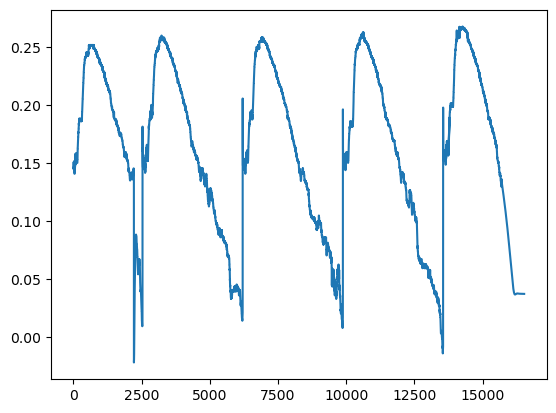

In [117]:
prev_y_and_new_y['signal_in_h2_in_o2_sensor'].plot()

In [110]:
lagged_y_trans

array([[0.53455881, 1.7299547 ],
       [0.53995649, 1.73017534],
       [0.53671788, 1.73039599],
       [0.53995649, 1.73061663],
       [0.53995649, 1.73083727],
       [0.53995649, 1.73105792],
       [0.53995649, 1.73127856],
       [0.54535763, 1.7314992 ],
       [0.54211695, 1.73171985],
       [0.54319718, 1.73194049]])

In [87]:
y_offset_1 = len(prev_y_and_new_y)
window_size = 10


fiter = pipeline.fit(prev_y_and_new_y)


lagged_y = prev_y_and_new_y.iloc[y_offset_1-window_size:y_offset_1]
print(lagged_y)

lagged_y_trans = fiter.transform(pd.DataFrame(lagged_y))
print(lagged_y_trans)


lagged_y_trans.shape
lagged_y_trans = np.reshape(lagged_y_trans, (1, 10, 2))

print(lagged_y_trans.shape)


predictions_1 = optimised_model_1.predict(lagged_y_trans)
predictions_2 = optimised_model_2.predict(lagged_y_trans)


predictions = predictions_1*0.65 + predictions_2*0.35


# predictions = optimised_model.predict(lagged_y_trans)
print(predictions)


scaler = fiter.named_transformers_['voltage_current_scaler']
true_predictions = scaler.inverse_transform(predictions)

prev_y_and_new_y


last_value = prev_y_and_new_y['trend'].iloc[-1]
new_row = pd.DataFrame({'signal_in_h2_in_o2_sensor': [true_predictions[0][0]], 'trend': [last_value+1]})

prev_y_and_new_y = pd.concat([prev_y_and_new_y, new_row], ignore_index=True)

print(prev_y_and_new_y)

# voltage_current_scaler

       signal_in_h2_in_o2_sensor  trend
15748                   0.135897  15748
15749                   0.135897  15749
15750                   0.135897  15750
15751                   0.135897  15751
15752                   0.135897  15752
15753                   0.135897  15753
15754                   0.135897  15754
15755                   0.135897  15755
15756                   0.135897  15756
15757                   0.135897  15757
[[0.54516126 1.72996241]
 [0.54516126 1.73018225]
 [0.54516126 1.73040208]
 [0.54516126 1.73062191]
 [0.54516126 1.73084174]
 [0.54516126 1.73106157]
 [0.54516126 1.7312814 ]
 [0.54516126 1.73150123]
 [0.54516126 1.73172106]
 [0.54516126 1.7319409 ]]
(1, 10, 2)
1/1 [==============================] - 0s 32ms/step
[[0.5519289]]
       signal_in_h2_in_o2_sensor  trend
0                       0.145329      0
1                       0.145329      1
2                       0.145329      2
3                       0.145329      3
4                       0.145329

[('voltage_current_scaler', MinMaxScaler(), ['signal_in_h2_in_o2_sensor']), ('trend_scaler', StandardScaler(), ['trend'])]


In [106]:
prev_y_and_new_y

,signal_in_h2_in_o2_sensor,trend
minutes,,
2024-06-24 08:37:00,0.145329,0
2024-06-24 08:38:00,0.145329,1
2024-06-24 08:39:00,0.145329,2
2024-06-24 08:40:00,0.145329,3
2024-06-24 08:41:00,0.145329,4
...,...,...
2024-07-06 08:17:00,0.134391,15695
2024-07-06 08:18:00,0.134391,15696
2024-07-06 08:19:00,0.135954,15697


In [145]:
new_data = downsampled_2_df.copy()
new_data

,signal_in_h2_in_o2_sensor
minutes,
2024-07-06 08:22:00,0.135954
2024-07-06 08:23:00,0.135954
2024-07-06 08:24:00,0.134391
2024-07-06 08:25:00,0.135016
2024-07-06 08:26:00,0.135954
...,...
2024-07-12 02:39:00,0.101265
2024-07-12 02:40:00,0.103140
2024-07-12 02:41:00,0.103140


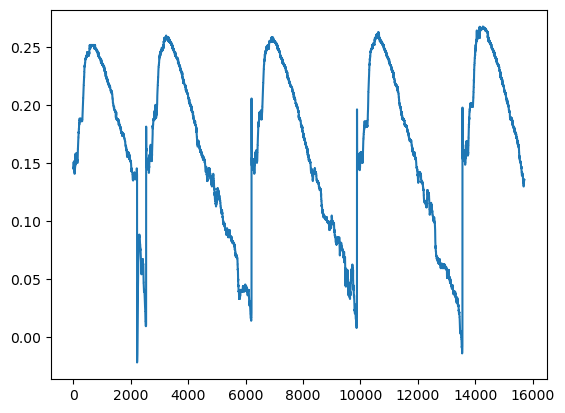

In [97]:
plt.plot(prev_y_and_new_y['signal_in_h2_in_o2_sensor'].tolist())

In [101]:
lagged_y

[0.2478322, 0.246895, 0.246895]

In [ ]:
downsampled_2_df = downsampled_df.tail(l-train_length)

plt.plot(downsampled_2_df['signal_in_h2_in_o2_sensor'].tolist())

plt.show()

In [ ]:
plt.plot(predictions)